In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\MachineLearning\train.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

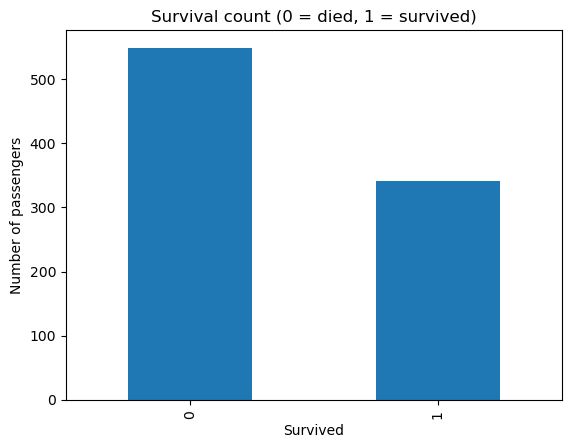

In [9]:
# A visual display of passengers who survived
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival count (0 = died, 1 = survived)")
plt.xlabel("Survived")
plt.ylabel("Number of passengers")
plt.show()

## Observations

1. Age column has 177 missing values
2. Cabin column has 697 missing values
3. Embarked column has 2 missing values
4. From observation of the chart, more people died than those who survived

## Data Cleaning

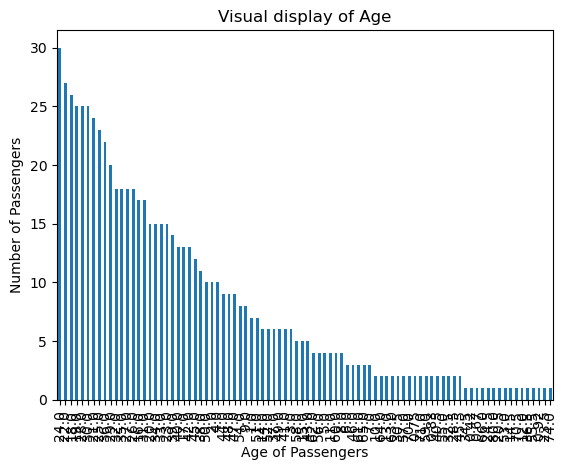

In [13]:

df['Age'].value_counts().plot(kind='bar')
plt.title("Visual display of Age")
plt.xlabel("Age of Passengers")
plt.ylabel("Number of Passengers")
plt.show()

<h3>Age</h3>
From the visual display it noticed that the age is not a normal distribution, hence using mean will not be favour. 
This is because the mean is affected by outliers, whereas the median is not affected by it, so in this case we will use the median

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

<h3>Embarked</h3>
Droping missing values of Embarked

In [15]:
df.dropna(subset=['Embarked'],inplace=True)

<h3>Cabin</h3>
Since there are a lot of missing values i will drop the entire column

In [16]:
df.drop(columns = ['Cabin'], inplace = True)

<h3>Duplicates</h3>
Checking for duplicates

In [17]:
print("Number of duplicates: ")
print(df.duplicated().sum())

Number of duplicates: 
0


## HANDLING OUTLIERS IN FARES

In [18]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
high_bound = Q3 - 1.5 * IQR

# Capping the fare values at the bounds
df['Fare'] = np.where(df['Fare'] > high_bound, high_bound,
                       np.where(df['Fare'] < lower_bound,lower_bound,df['Fare']))

# VERIFY CLEANING

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# FINDINGS
In this exercise, I formulated the problem of predicting passenger survival on the Titanic as a binary classification task. The business objective is to help improve future rescue and evacuation strategies by identifying which passengers are more likely to survive. The outcome is predicting whether a passenger survived (1) or not (0). I chose recall as the success metric because, in such life-or-death situations, it is more important to correctly identify as many survivors as possible, even if some false positives occur.

During data exploration, I found that the dataset contains 891 rows and 12 columns. Some columns, such as Age, Cabin, and Embarked, had missing values. I cleaned the dataset by filling missing ages with the median, dropping rows with missing embarked values, and removing the Cabin column since it had too many missing entries. I also checked for duplicates and handled outliers in the Fare column using the IQR method. After cleaning, the dataset had no missing values and was ready for further analysis. This process showed me how important it is to carefully prepare and understand data before building any machine learning models.

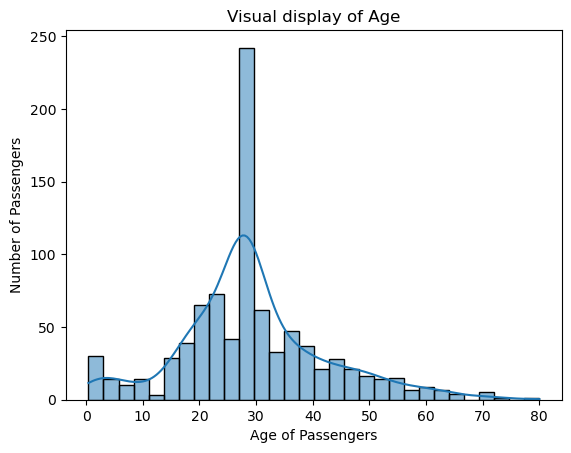

In [26]:
import seaborn as sns

sns.histplot(df['Age'],kde=True)
plt.title("Visual display of Age")
plt.xlabel("Age of Passengers")
plt.ylabel("Number of Passengers")
plt.show()

In [23]:
print(df['Age'].mean())

29.315151856017994


In [24]:
print(df['Age'].median())

28.0
